!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,1000)
IceAmericano = Temperature + np.random.normal(100,8,1000)
InteriorPrice = np.random.normal(60,20,1000)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [4]:
Data.describe()

,Temp,Sales,InteriorPrice
count,1000.000000,1000.000000,1000.000000
mean,29.864230,129.973165,58.975429
std,2.962581,8.208507,19.091885
min,20.861571,105.472846,-2.337132
25%,27.904740,124.141116,45.266707
50%,29.825916,129.810618,58.950044
75%,31.820852,135.284894,72.432322
max,38.278065,155.283252,118.581925


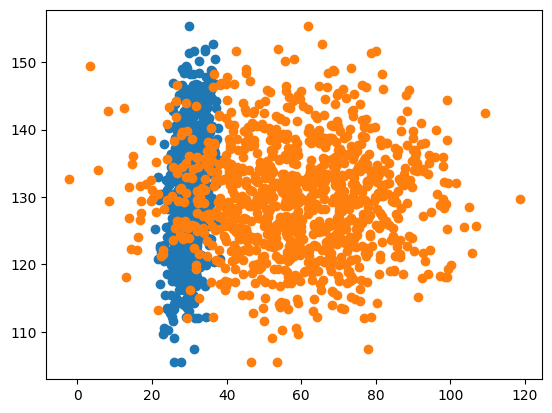

In [5]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [6]:
Train_x = Data[['Temp', 'InteriorPrice']].iloc[:800,:]
Train_y = Data[['Sales']].iloc[:800]

In [7]:
Valid_x = Data[['Temp', 'InteriorPrice']].iloc[-200:,:]
Valid_y = Data[['Sales']].iloc[-200:]

<br><br><br>
기본 Linear model 구성

In [8]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 1s 3ms/step - loss: 2927.9084
Epoch 2/70
25/25 [==============================] - 0s 4ms/step - loss: 788.0376
Epoch 3/70
25/25 [==============================] - 0s 4ms/step - loss: 347.8111
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 164.6552
Epoch 5/70
25/25 [==============================] - 0s 3ms/step - loss: 141.0676
Epoch 6/70
25/25 [==============================] - 0s 3ms/step - loss: 141.0708
Epoch 7/70
25/25 [==============================] - 0s 3ms/step - loss: 146.7345
Epoch 8/70
25/25 [==============================] - 0s 3ms/step - loss: 141.0005
Epoch 9/70
25/25 [==============================] - 0s 3ms/step - loss: 133.8438
Epoch 10/70
25/25 [==============================] - 0s 4ms/step - loss: 141.1464
Epoch 11/70
25/25 [==============================] - 0s 3ms/step - loss: 137.7360
Epoch 12/70
25/25 [==============================] - 0s 3ms/step - loss: 143.7295
Epoch 13/70
25/25 [=====

In [10]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 1s 3ms/step - loss: 62.9697
Epoch 2/70
25/25 [==============================] - 0s 3ms/step - loss: 61.5001
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1904
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1871
Epoch 5/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1481
Epoch 6/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1293
Epoch 7/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1277
Epoch 8/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1337
Epoch 9/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1361
Epoch 10/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1969
Epoch 11/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1308
Epoch 12/70
25/25 [==============================] - 0s 3ms/step - loss: 61.1431
Epoch 13/70
25/25 [==================

In [11]:
Pred = model.predict(Valid_x)
Pred

7/7 [==============================] - 0s 3ms/step


array([[134.57115 ],
       [132.76509 ],
       [129.9602  ],
       [128.87514 ],
       [132.92445 ],
       [131.25519 ],
       [131.97087 ],
       [130.18584 ],
       [124.95759 ],
       [129.57849 ],
       [128.39565 ],
       [131.84033 ],
       [133.29117 ],
       [128.0818  ],
       [131.70947 ],
       [135.48637 ],
       [128.1895  ],
       [135.35284 ],
       [127.57824 ],
       [130.1987  ],
       [130.09186 ],
       [130.09003 ],
       [127.551125],
       [128.36998 ],
       [128.16052 ],
       [131.1695  ],
       [131.19821 ],
       [136.86134 ],
       [134.1988  ],
       [128.39804 ],
       [131.22992 ],
       [133.11076 ],
       [130.41238 ],
       [129.86537 ],
       [130.139   ],
       [132.79846 ],
       [127.39156 ],
       [129.28923 ],
       [131.68695 ],
       [131.09877 ],
       [130.72153 ],
       [129.0562  ],
       [133.16139 ],
       [136.78204 ],
       [131.34271 ],
       [129.36905 ],
       [132.34196 ],
       [128.3

In [12]:
Pred = [pred[0] for pred in Pred]

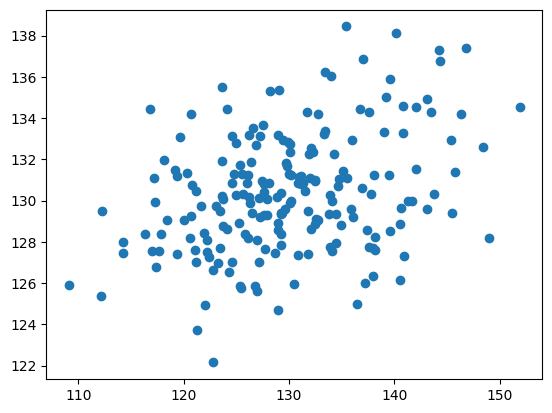

In [13]:
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<br><br><br>
모델의 weight, 그리고 상수 확인

In [15]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.00794441,  0.366109  , -0.3951419 ],
        [ 0.01943159, -0.10687841, -0.07021635]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ -1.7812084,  11.72221  , -10.577875 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.44193503,  0.4266662 , -0.34568813,  0.47562972,  1.2262243 ,
         -0.10271764, -0.30944815,  1.0954455 ,  0.16895817,  0.1608512 ],
        [-0.00710721,  0.6743668 , -0.20420587, -1.2007489 , -0.44130242,
         -0.6216769 ,  0.03550934, -0.44391277,  0.06186652, -0.68497175],
        [-0.7041577 , -0.12361868,  0.4297986 ,  0.18231669,  0.06814782,
          0.3921957 , -0.6194109 ,  0.18295921,  0.07992341,  0.97486264]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([12.582537  , 13.661403  ,  0.        , -0.6005501 ,  0.33722505,
         0.   

<br><br><br>
모델의 weight, 상수만 출력

In [16]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[ 0.00794441  0.366109   -0.3951419 ]
 [ 0.01943159 -0.10687841 -0.07021635]]

1 번째 Layer 상수
[ -1.7812084  11.72221   -10.577875 ]

2 번째 Layer coefficients
[[-0.44193503  0.4266662  -0.34568813  0.47562972  1.2262243  -0.10271764
  -0.30944815  1.0954455   0.16895817  0.1608512 ]
 [-0.00710721  0.6743668  -0.20420587 -1.2007489  -0.44130242 -0.6216769
   0.03550934 -0.44391277  0.06186652 -0.68497175]
 [-0.7041577  -0.12361868  0.4297986   0.18231669  0.06814782  0.3921957
  -0.6194109   0.18295921  0.07992341  0.97486264]]

2 번째 Layer 상수
[12.582537   13.661403    0.         -0.6005501   0.33722505  0.
 12.414861   -0.6191364  13.2554865  -0.78329057]

3 번째 Layer coefficients
[[1.0587183 ]
 [1.4801736 ]
 [0.68943506]
 [0.04455601]
 [1.3638409 ]
 [0.55347663]
 [1.1524426 ]
 [0.1800684 ]
 [0.9087315 ]
 [0.0597208 ]]

3 번째 Layer 상수
[10.670596]



# L2 regularizer (Ridge)

In [17]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.1)))

In [18]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 1s 3ms/step - loss: 3459.1008
Epoch 2/70
25/25 [==============================] - 0s 3ms/step - loss: 226.5546
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 186.4633
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 151.8798
Epoch 5/70
25/25 [==============================] - 0s 3ms/step - loss: 166.9558
Epoch 6/70
25/25 [==============================] - 0s 4ms/step - loss: 164.1565
Epoch 7/70
25/25 [==============================] - 0s 4ms/step - loss: 155.0478
Epoch 8/70
25/25 [==============================] - 0s 3ms/step - loss: 167.1302
Epoch 9/70
25/25 [==============================] - 0s 4ms/step - loss: 154.1817
Epoch 10/70
25/25 [==============================] - 0s 3ms/step - loss: 149.0487
Epoch 11/70
25/25 [==============================] - 0s 3ms/step - loss: 141.1099
Epoch 12/70
25/25 [==============================] - 0s 3ms/step - loss: 156.9409
Epoch 13/70
25/25 [=====

In [19]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 1s 3ms/step - loss: 64.5609
Epoch 2/70
25/25 [==============================] - 0s 4ms/step - loss: 63.5803
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 63.4670
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 63.3049
Epoch 5/70
25/25 [==============================] - 0s 4ms/step - loss: 63.2431
Epoch 6/70
25/25 [==============================] - 0s 5ms/step - loss: 63.1672
Epoch 7/70
25/25 [==============================] - 0s 4ms/step - loss: 63.1053
Epoch 8/70
25/25 [==============================] - 0s 3ms/step - loss: 63.0738
Epoch 9/70
25/25 [==============================] - 0s 6ms/step - loss: 63.0020
Epoch 10/70
25/25 [==============================] - 0s 5ms/step - loss: 62.9902
Epoch 11/70
25/25 [==============================] - 0s 5ms/step - loss: 62.9254
Epoch 12/70
25/25 [==============================] - 0s 6ms/step - loss: 62.8979
Epoch 13/70
25/25 [==================

7/7 [==============================] - 0s 2ms/step


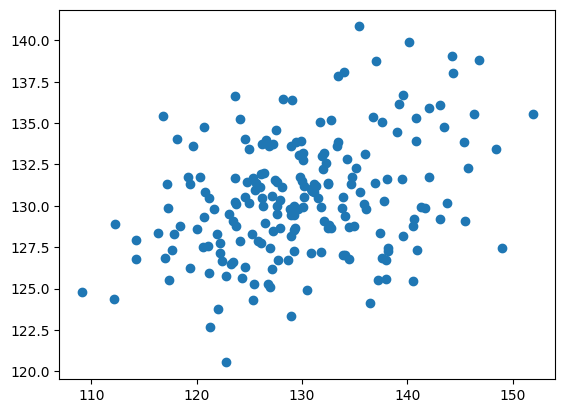

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [20]:
Pred = model.predict(Valid_x)
Pred

Pred = [pred[0] for pred in Pred]
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

model.summary()

In [21]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.1926577 , -0.5962311 , -0.28054947],
        [ 0.09064971,  0.41023922, -0.30193725]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([  0.18763697, -13.089933  , -12.043727  ], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.2566153 , -0.69536465, -0.16332974,  0.6137922 ,  0.41327843,
          0.08352488, -0.2805406 , -0.14032301, -0.26908267,  0.13972454],
        [ 0.24381405, -0.86739635, -0.14890866, -0.03518343,  0.618351  ,
          0.29380476,  0.1581291 , -0.42162606, -1.0361127 ,  0.3319731 ],
        [ 0.35674703,  0.75707257,  0.96111465,  0.6183634 , -1.0616856 ,
          0.5914637 ,  0.23498666,  0.9504616 , -0.2914763 ,  0.8108342 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.        , -0.33744133, -0.8438627 ,  0.        , 11.798035  ,
       

In [22]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.1926577  -0.5962311  -0.28054947]
 [ 0.09064971  0.41023922 -0.30193725]]

1 번째 Layer 상수
[  0.18763697 -13.089933   -12.043727  ]

2 번째 Layer coefficients
[[-0.2566153  -0.69536465 -0.16332974  0.6137922   0.41327843  0.08352488
  -0.2805406  -0.14032301 -0.26908267  0.13972454]
 [ 0.24381405 -0.86739635 -0.14890866 -0.03518343  0.618351    0.29380476
   0.1581291  -0.42162606 -1.0361127   0.3319731 ]
 [ 0.35674703  0.75707257  0.96111465  0.6183634  -1.0616856   0.5914637
   0.23498666  0.9504616  -0.2914763   0.8108342 ]]

2 번째 Layer 상수
[ 0.         -0.33744133 -0.8438627   0.         11.798035    0.
  0.         -0.66294795 16.237204   -0.5347043 ]

3 번째 Layer coefficients
[[ 1.96777532e-36]
 [ 3.50986838e-01]
 [ 1.11825643e-02]
 [-5.29790368e-38]
 [ 1.14953506e+00]
 [ 7.85985071e-36]
 [-2.52394185e-36]
 [ 2.04495545e-02]
 [ 1.91291714e+00]
 [-1.19858255e-11]]

3 번째 Layer 상수
[8.868819]



# L1 regularizer (Lasso)

In [23]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l1(0.1)))


model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 1s 3ms/step - loss: 2367.1841
Epoch 2/70
25/25 [==============================] - 0s 3ms/step - loss: 227.4569
Epoch 3/70
25/25 [==============================] - 0s 4ms/step - loss: 169.2722
Epoch 4/70
25/25 [==============================] - 0s 3ms/step - loss: 164.2943
Epoch 5/70
25/25 [==============================] - 0s 4ms/step - loss: 151.2560
Epoch 6/70
25/25 [==============================] - 0s 3ms/step - loss: 146.1305
Epoch 7/70
25/25 [==============================] - 0s 3ms/step - loss: 150.7196
Epoch 8/70
25/25 [==============================] - 0s 3ms/step - loss: 143.2117
Epoch 9/70
25/25 [==============================] - 0s 4ms/step - loss: 146.1093
Epoch 10/70
25/25 [==============================] - 0s 3ms/step - loss: 177.1830
Epoch 11/70
25/25 [==============================] - 0s 4ms/step - loss: 144.9811
Epoch 12/70
25/25 [==============================] - 0s 4ms/step - loss: 161.2946
Epoch 13/70
25/25 [=====

25/25 [==============================] - 0s 3ms/step - loss: 62.7174
Epoch 32/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6664
Epoch 33/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6511
Epoch 34/70
25/25 [==============================] - 0s 3ms/step - loss: 62.7218
Epoch 35/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6795
Epoch 36/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6358
Epoch 37/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6689
Epoch 38/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6160
Epoch 39/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6349
Epoch 40/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6151
Epoch 41/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6455
Epoch 42/70
25/25 [==============================] - 0s 3ms/step - loss: 62.6087
Epoch 43/70
25/25 [=====================

In [24]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.7329519   0.09913646  0.07170322]
 [ 0.18892777  0.13733432  0.29408404]]

1 번째 Layer 상수
[-12.139299 -12.874837  10.110554]

2 번째 Layer coefficients
[[ 0.21991996 -0.6351665  -0.5011918   0.46121705 -0.46981677  2.1703002
   0.77454454  1.754741    0.2551412   0.449324  ]
 [-0.38966408 -0.04580569  0.4452168  -0.22012544 -0.39277983  2.5108302
  -0.23226388  2.0262442  -0.07344139 -0.3230379 ]
 [ 0.26126224  0.85291445  0.47741565 -0.48559213 -0.49162585 -2.7391784
  -0.09627245 -2.1397667  -0.6003353  -0.07137996]]

2 번째 Layer 상수
[12.362534   13.599407   12.110258    0.         13.934229   -2.4301999
 -0.32068557 -1.8391074  -0.3161151   0.        ]

3 번째 Layer coefficients
[[ 6.70943499e-01]
 [ 1.07333291e+00]
 [ 1.09324086e+00]
 [ 1.30834915e-05]
 [ 1.05015492e+00]
 [ 1.20021057e+00]
 [ 1.04027599e-01]
 [-1.29078960e+00]
 [-3.99580458e-05]
 [-9.19147988e-06]]

3 번째 Layer 상수
[10.299055]

